In [20]:
#importing important libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
url= ('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [4]:
df = pd.read_csv(url, index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [5]:
# Check for missing values
print(df.isnull().sum())

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [6]:
# Preprocess the data
# drop null values
df = df.dropna()

<AxesSubplot:xlabel='Price'>

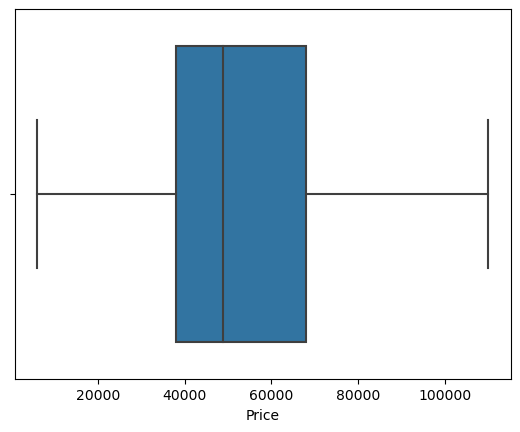

In [21]:
sns.boxplot(x=df['Price'])

In [23]:
# remove the outliers
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1
df = df[(df['Price'] > (q1 - 1.5 * iqr)) & (df['Price'] < (q3 + 1.5 * iqr))]

In [8]:
# Split the data into train and test sets
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)

MSE: 401487570.46258867
RMSE: 20037.154749679125
R-squared: 0.7202087278032016


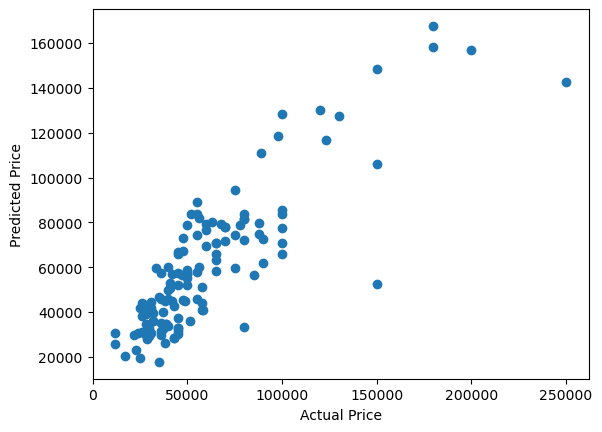

In [12]:
# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()